**Задача 1. Минимизация гладкой функции**

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [73]:
import math
#from math import sin, exp
import scipy
from scipy.optimize import minimize
import numpy as np



x0 = np.arange(31)

def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

mini = scipy.optimize.minimize(f, 30, method='BFGS')

#print (f(1))
#print (x0)
print (mini)

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])


Вывод: результат поиска минимума меняется при изменении начального приближения. У нас есть 2 ямы. В точке ~25.88 и ~4.1. 
При выборе точек от 0 до 10,чаще алгоритм выбирает минимум ~4.1. При выборе бОльших значений,алгоритм чаще выбирает ~25.88.

У функции f(x) на отрезке [1, 30] есть два минимума. Взяв начальное приближение x=2 мы попадаем в первый, а начав с точки x=30 – во второй. Второй минимум значительно меньше, и он является глобальным минимумом функции на отрезке [1, 30]

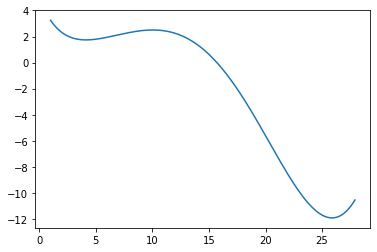

In [46]:
import math
import matplotlib.pyplot as plt
%matplotlib inline 

x = np.arange(1, 28,0.1) 

def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

plt.figure()
plt.plot(x, f(x))
plt.show()

**Задача 2. Глобальная оптимизация**

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [72]:
import scipy
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
import numpy as np

x0 = np.arange(31)
bounds = [(1, 30)]
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

mini = scipy.optimize.differential_evolution(f, bounds)

#print (f(1))
#print (x0)
print (mini)

     fun: array([-11.89889467])
     jac: array([1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 68
     nit: 3
 success: True
       x: array([25.88019339])


Заметим, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
Сравним количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

В этом примере дифференциальная эволюция успешно справляется с тем, чтобы найти минимум функции f(x). При этом найденный минимум – глобальный. Это достигается благодаря тому, что за счет стадии мутации в дифференциальную эволюцию уже встроена возможность “выбивания” из локальных минимумов функции.

**Задача 3. Минимизация негладкой функции**

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

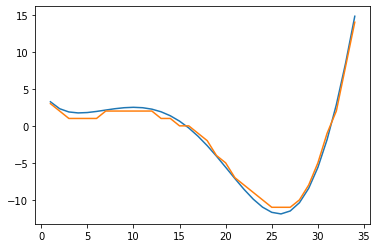

In [96]:
import math
import matplotlib.pyplot as plt
%matplotlib inline 

x = np.arange(1, 35) 

def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def h(x):
    return f(x).astype(int)

plt.figure()
plt.plot(x, f(x))
plt.plot(x, h(x))
plt.show()

In [98]:
import math
import scipy
from scipy.optimize import minimize
import numpy as np



#x = np.arange(31)

def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
def h(x):
    return f(x).astype(int)

mini = scipy.optimize.minimize(h, 30, method='BFGS')

#print (f(1))
#print (x0)
print (mini)

      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])


In [99]:
import scipy
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
import numpy as np

x0 = np.arange(31)
bounds = [(1, 30)]
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
def h(x):
    return f(x).astype(int)

mini = scipy.optimize.differential_evolution(h, bounds)

#print (f(1))
#print (x0)
print (mini)

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 6
 success: True
       x: array([26.30683632])


BFGS завершил свою работу на первой же итерации (посмотрите на график функции h(x) и подумайте, почему), в то время как дифференциальная эволюция не испытывает сложностей из-за отсутствия градиента и успешно находит глобальный минимум h(x)